# ケーススタディ２： 回帰

UCIで提供されているデータセット[Bike Sharing Dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)を使う。

機械学習を使って、自転車の貸出の予測をする例

In [152]:
!pip3 install -U ucimlrepo --break-system-packages | tail -1

In [153]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

## データ確認

In [154]:
display(X.head())
display(X.tail())

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343
17378,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343


In [155]:
X['dteday'].value_counts()

dteday
2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 731, dtype: int64

「日付の扱い」も、このケーススタディのテーマの１つ

In [156]:
X.columns = ['日付', '季節', '年', '月', '時間', '祝日', '曜日', '勤務日', '天気', '気温', '体感温度', '湿度', '風速']
#X.columns
X.head()

,日付,季節,年,月,時間,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [157]:
X.isnull().sum()

日付      0
季節      0
年       0
月       0
時間      0
祝日      0
曜日      0
勤務日     0
天気      0
気温      0
体感温度    0
湿度      0
風速      0
dtype: int64

欠損値はゼロ

In [158]:
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


array([[<Axes: title={'center': '季節'}>, <Axes: title={'center': '年'}>,
        <Axes: title={'center': '月'}>],
       [<Axes: title={'center': '時間'}>, <Axes: title={'center': '祝日'}>,
        <Axes: title={'center': '曜日'}>],
       [<Axes: title={'center': '勤務日'}>, <Axes: title={'center': '天気'}>,
        <Axes: title={'center': '気温'}>],
       [<Axes: title={'center': '体感温度'}>, <Axes: title={'center': '湿度'}>,
        <Axes: title={'center': '風速'}>]], dtype=object)

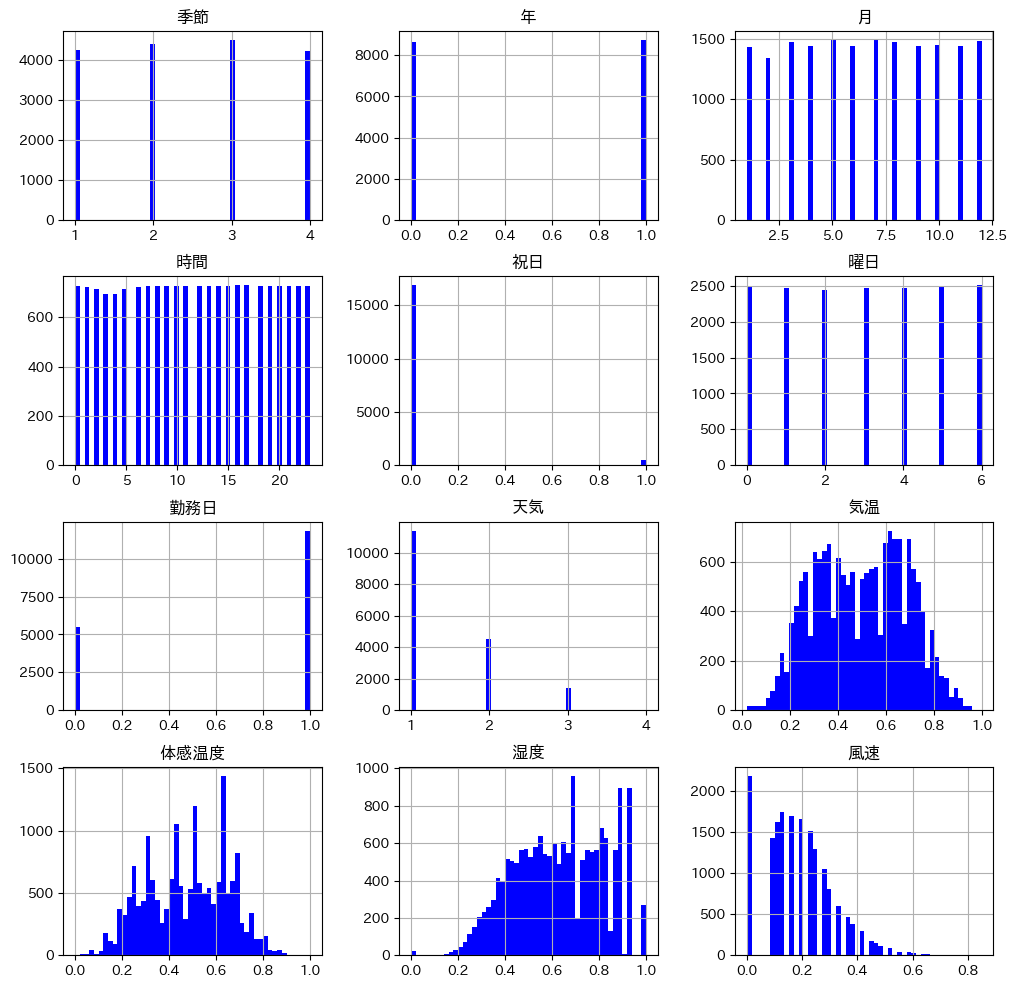

In [159]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (12, 12)

X.hist(bins=50, color='b')

Text(0.5, 1.0, '利用者数')

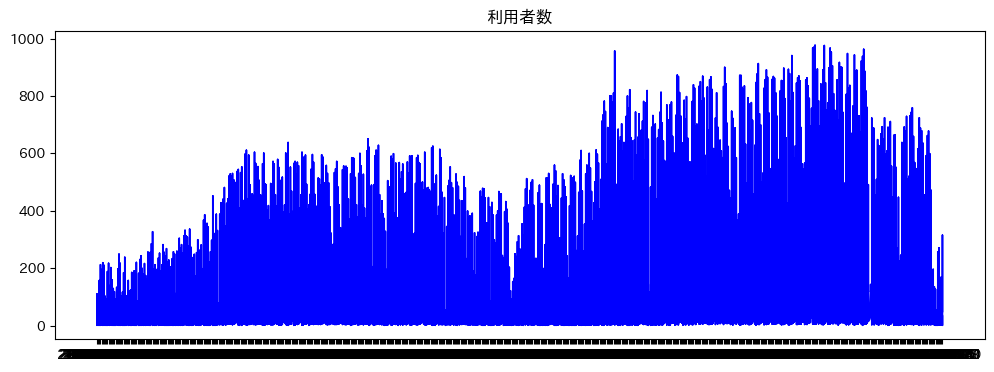

In [160]:
plt.figure(figsize=(12, 4))

plt.plot(X['日付'], y, c='b')
#plt.grid("major")
plt.title('利用者数')



1. 情報として「年」「月」があるので「日付」の情報は冗長として落とす

詳細な日付まで含めた回帰は、時系列分析に該当する。今回は「回帰」と割り切って分析する。

2. 「回帰」なので、特定の日付の前後で訓練データ、テストデータに分割する

２０１２年１１月１日を区切り日とする。

In [161]:
X1 = X.drop(['日付'], axis=1)
y1 = y.values

In [162]:
import pandas as pd

mday = pd.to_datetime('2012-11-1')

# ucimlrepoのローダで日付はobject型となっているので変換が必要
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html
X['日付'] = X['日付'].map(pd.to_datetime)

train_index = X['日付'] < mday
test_index = X['日付'] >= mday

x_train = X1[train_index]
x_test = X1[test_index]

y_train = y1[train_index]
y_test = y1[test_index]

print(x_train.head())
print(x_train.tail())
print('-' * 50)
print(x_test.head())
print(x_test.tail())

   季節  年  月  時間  祝日  曜日  勤務日  天気    気温    体感温度    湿度   風速
0   1  0  1   0   0   6    0   1  0.24  0.2879  0.81  0.0
1   1  0  1   1   0   6    0   1  0.22  0.2727  0.80  0.0
2   1  0  1   2   0   6    0   1  0.22  0.2727  0.80  0.0
3   1  0  1   3   0   6    0   1  0.24  0.2879  0.75  0.0
4   1  0  1   4   0   6    0   1  0.24  0.2879  0.75  0.0
       季節  年   月  時間  祝日  曜日  勤務日  天気    気温    体感温度    湿度      風速
15914   4  1  10  19   0   3    1   2  0.40  0.4091  0.50  0.1940
15915   4  1  10  20   0   3    1   2  0.40  0.4091  0.50  0.1940
15916   4  1  10  21   0   3    1   2  0.40  0.4091  0.50  0.1940
15917   4  1  10  22   0   3    1   1  0.36  0.3485  0.57  0.1343
15918   4  1  10  23   0   3    1   1  0.36  0.3636  0.57  0.0896
--------------------------------------------------
       季節  年   月  時間  祝日  曜日  勤務日  天気    気温    体感温度    湿度      風速
15919   4  1  11   0   0   4    1   1  0.36  0.3636  0.57  0.0896
15920   4  1  11   1   0   4    1   1  0.30  0.3182  0.75  0.1045
15921  

/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_8712/162808752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['日付'] = X['日付'].map(pd.to_datetime)


## 学習・評価

In [166]:
from xgboost import XGBRegressor

algorithm = XGBRegressor(objective='reg:squarederror', random_state=123)
algorithm.fit(x_train, y_train)

y_pred = algorithm.predict(x_test)
print(y_pred[:5])

score = algorithm.score(x_test, y_test)

from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_pred)
print(f'score: {score:.4f} / r2_score: {r2score:.4f}')

[36.419834 18.746622 16.736658  9.981839 12.230625]
score: 0.7948 / r2_score: 0.7948


algorithm.scoreとr2_scoreの値が一致するのは、xgboost.XGBRegressor.scoreも
同じ関数を使っているから。

一般にR^2 scoreは0.5以上であれば、良いモデルであるとされている。

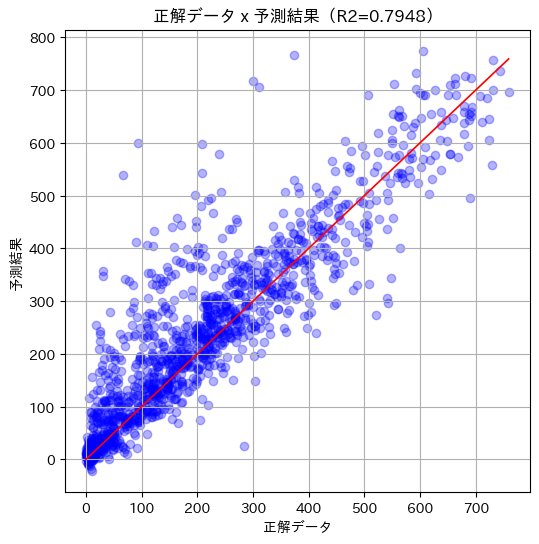

In [173]:
plt.figure(figsize=(6, 6))
y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), c='r')
plt.scatter(y_test, y_pred, c='b', alpha=0.3)
plt.title(f'正解データ x 予測結果（R2={r2score:.4f}）')
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.grid()

今回、回帰分析であり、時系列分析ではなかったが、時系列グラフも確認してみる

Text(0.5, 1.0, '利用者予測')

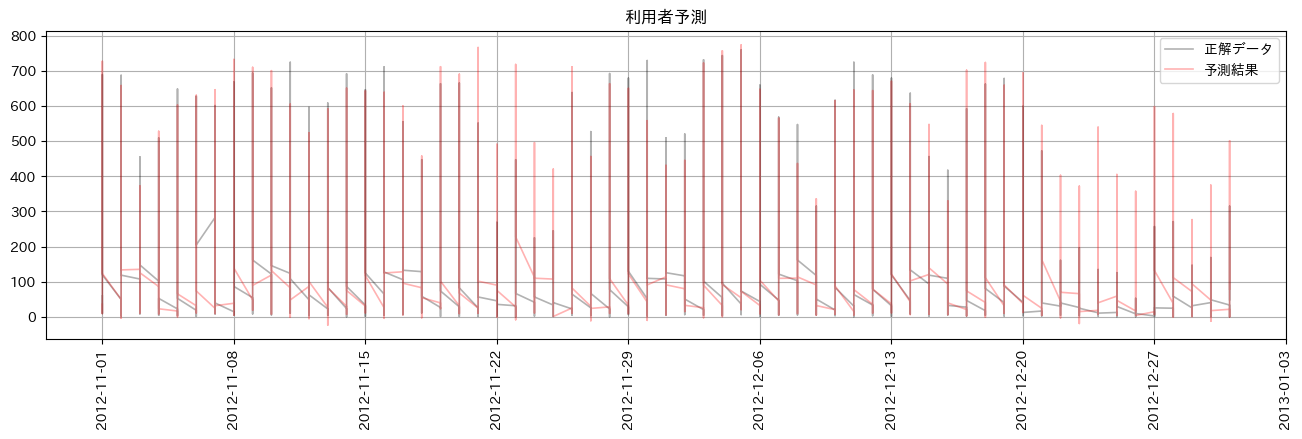

In [168]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(dates_test, y_test, label='正解データ', c='k', alpha=0.3)
ax.plot(dates_test, y_pred, label='予測結果', c='r', alpha=0.3)

weeks = mdates.WeekdayLocator(byweekday=mdates.TH)

ax.xaxis.set_major_locator(weeks)

ax.tick_params(axis='x', rotation=90)

ax.grid()
ax.legend()
ax.set_title('利用者予測')

入力データに関して「月」と「季節」は周期性があるのに、最初の値と最後の値に連続性がない（いちばん離れている）。
そこでOne Hotエンコーディングを適用してみる。

In [169]:
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column).astype(int)
    df = pd.concat([df.drop([column], axis=1), df_dummy], axis=1)
    return df

X2 = X1.copy()
X2 = enc(X2, '月')
X2 = enc(X2, '季節')

X2.head()

,年,時間,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,...,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
0,0,0,0,6,0,1,0.24,0.2879,0.81,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,2,0,6,0,1,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,3,0,6,0,1,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0,4,0,6,0,1,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,1,0,0,0


In [170]:
from xgboost import XGBRegressor

algorithm = XGBRegressor(objective='reg:squarederror', random_state=123)

x2_train = X2[train_index]
x2_test = X2[test_index]
y2_train = y1[train_index]
y2_test = y1[test_index]

algorithm.fit(x2_train, y2_train)

y2_pred = algorithm.predict(x2_test)


score2 = algorithm.score(x2_test, y2_test)

from sklearn.metrics import r2_score

r2score2 = r2_score(y2_test, y2_pred)

print(y_pred[:5])
print(f'score: {score:.4f} / r2_score: {r2score:.4f}')
print(y2_pred[:5])
print(f'score: {score2:.4f} / r2_score: {r2score2:.4f}')

[36.419834 18.746622 16.736658  9.981839 12.230625]
score: 0.7948 / r2_score: 0.7948
[36.06386  12.963034 17.104061 10.96956  16.856962]
score: 0.8694 / r2_score: 0.8694


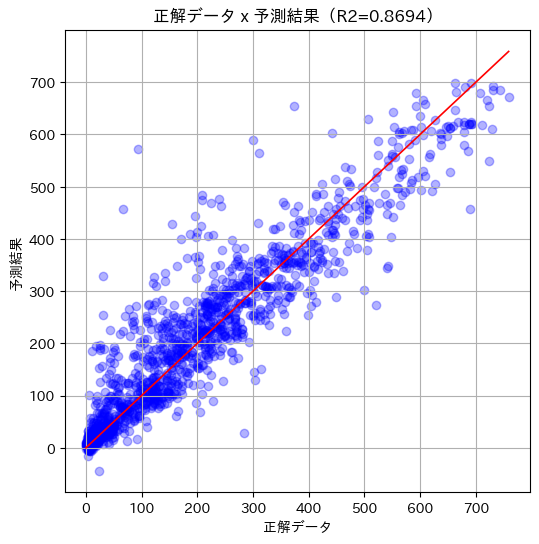

In [174]:
plt.figure(figsize=(6, 6))
y2_max = y2_test.max()
plt.plot((0, y2_max), (0, y2_max), c='r')
plt.scatter(y2_test, y2_pred, c='b', alpha=0.3)
plt.title(f'正解データ x 予測結果（R2={r2score2:.4f}）')
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.grid()

散布図で見た目の違いは顕著ではないが、R2 scoreは向上している。

Text(0.5, 1.0, '利用者予測')

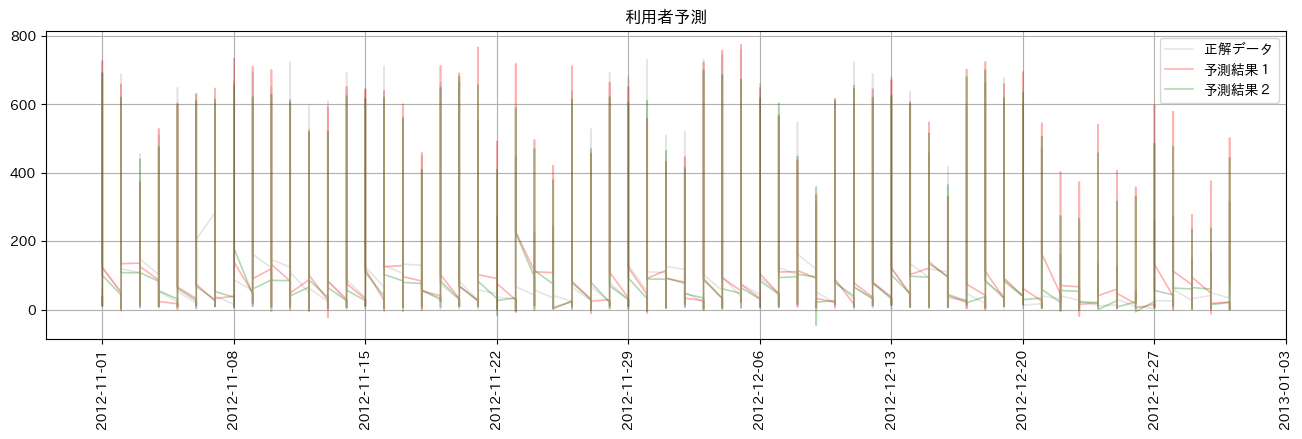

In [178]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(dates_test, y2_test, label='正解データ', c='k', alpha=0.1)
ax.plot(dates_test, y_pred, label='予測結果１', c='r', alpha=0.3)
ax.plot(dates_test, y2_pred, label='予測結果２', c='g', alpha=0.3)

weeks = mdates.WeekdayLocator(byweekday=mdates.TH)

ax.xaxis.set_major_locator(weeks)

ax.tick_params(axis='x', rotation=90)

ax.grid()
ax.legend()
ax.set_title('利用者予測')

<Axes: title={'center': '重要度分析（利用者数）'}, xlabel='F score', ylabel='Features'>

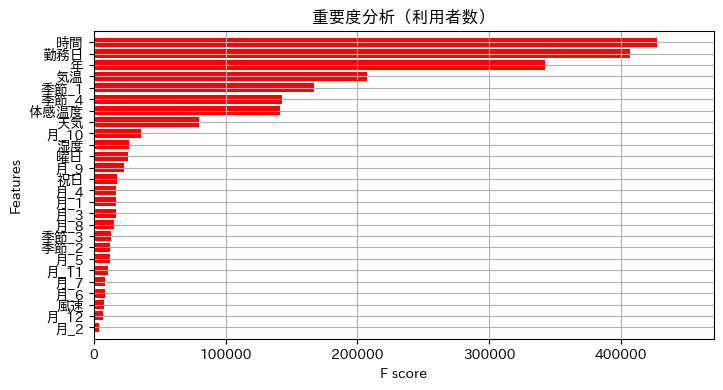

In [179]:
import xgboost as xgb

fig, ax = plt.subplots(figsize=(8, 4))
xgb.plot_importance(algorithm, ax=ax, height=0.8, importance_type='gain', show_values=False, title='重要度分析（利用者数）')

「時間帯」「勤務日（平日）」そして「年」「気温」の影響が大きい。